# Assignment 2

## 2.1 EDA
(1) Perform an initial EDA on the given data to gain an understanding of the data. The analyses
should explore the data from four different aspects including:

(a) Describe the summary statistics about the data including number of instances, number of features, how
many categorical and numerical features, respectively

(b) Find the top 5 numerical features highly correlated with the target variable (“SalePrice”) according to
the pearson correlation, report the correlation values.

(c) Plot the distributions of these 5 numerical features found in the previous question and the target variable
using histograms with 10 bins, one for each feature/variable, describe the shape of their distributions with
skewness and kurtosis (use Scipy for obtaining skewness and kurtosis values if you cannot do it in Orange),
and tell two patterns from the histograms accordingly

(d) Check for missing values. Is there any missing values in the data? Write a paragraph to briefly summarise
the missing information regarding how many features contain missing values and at what percent.

Provide answers to these four questions. Show how you get the answers in your code (if you use python)/workflow
(if you use orange). Report your EDA methods and results in the report.

In [12]:
# importing pandas, and other necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy as sp

# load data set
df = pd.read_csv("House_Price.csv", header = 0)

### Part 1 - Task 1 (a) 

**Describe the summary statistics about the data including number of instances, number of features, how many categorical and numerical features, respectively.**

The data set contains 79 different features, plus an id and the SalesPrice variable, which is what this is meant to find. There are 1460 instances. There are a total of 38 numerical and 43 categorical features.

In [25]:
print("Information on Variables")
df.info()

Information on Variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

### Part 2 - Task 1 (b)

**Find the top 5 numerical features highly correlated with the target variable (“SalePrice”) according to the pearson correlation, report the correlation values.**

The top five values are the following, all of which are numerical:
1. OverallQual      0.790982
2. GrLivArea        0.708624
3. GarageCars       0.640409
4. GarageArea       0.623431
5. TotalBsmtSF      0.613581

In [4]:
df.corrwith(df['SalePrice']).abs().sort_values()

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchebvGr       0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float

### Part 1 - Task 1 (c)

**Plot the distributions of these 5 numerical features found in the previous question and the target variable using histograms with 10 bins, one for each feature/variable, describe the shape of their distributions with skewness and kurtosis (use Scipy for obtaining skewness and kurtosis values if you cannot do it in Orange), and tell two patterns from the histograms accordingly.**

The SalePrice is skewed to the left (1.880940746034036), like TotalBsmtSF (1.522688086978629) and GrLivArea (1.365155954773434). Most kurtosis values are around 3, but the SalePrice is 9.509812011089439; the closest is GrLivArea at 7.874265760253215, meaning that GrLivArea is closest related to SalePrice.



 OverallQual


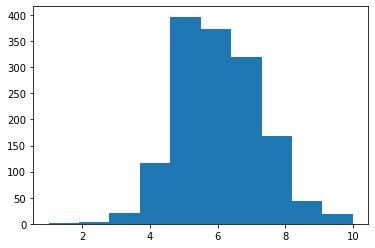

Skewness:  0.2167209765258641
Kurtosis:  3.091856548449611

 GrLivArea


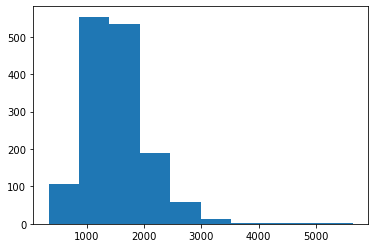

Skewness:  1.365155954773434
Kurtosis:  7.874265760253215

 GarageCars


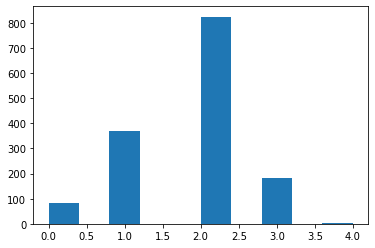

Skewness:  -0.34219689543081294
Kurtosis:  3.216134871511073

 GarageArea


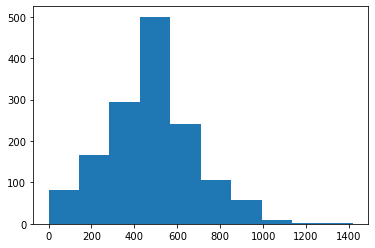

Skewness:  0.1797959420587727
Kurtosis:  3.9098227950882034

 TotalBsmtSF


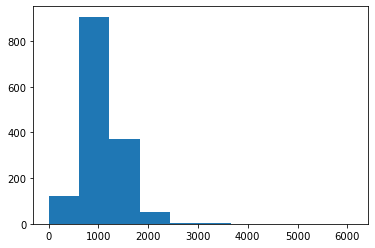

Skewness:  1.522688086978629
Kurtosis:  16.201041630635025

 SalePrice


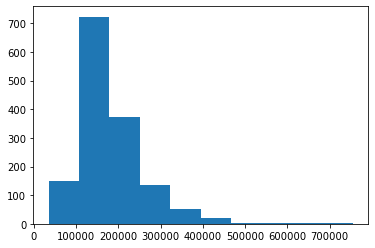

Skewness:  1.880940746034036
Kurtosis:  9.509812011089439


In [5]:
names = [ 'OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF', 'SalePrice']

for name in names:
    val = df[name]
    # Plot the distribution
    print("\n", name)
    plt.hist((val.abs()))
    plt.show()

    # Skewness

    print("Skewness: ", sp.stats.skew(val))

    # Kurtosis

    print("Kurtosis: ", sp.stats.kurtosis(val, fisher=False))


### Part 1 - Task 1 (d)

**Check for missing values. Is there any missing values in the data? Write a paragraph to briefly summarise the missing information regarding how many features contain missing values and at what percent.**

19 features are missing values (which is circa 24% of features), and of those, only 3 (circa 4% of all features and 16% of all features missing values) features are missing less than 1% of values. 

* LotFrontage:  missing 259 values, at circa 18% missing.
* Alley:  missing 1369 values, at circa 94% missing.
* MasVnrType: missing 8 values at circa 0.55% missing.
* MasVnrArea: missing 8 values at circa 0.55% missing.
* BsmtQual: missing 37 values at circa 2.53% missing.
* BsmtCond: missing 37 values at circa 2.53% missing.
* BsmtExposure: missing 38 values at circa 2.6% missing.
* BsmtFinType1: missing 37 values at circa 2.53% missing.
* BsmtFinType2: missing 38 values at circa 2.6% missing.
* Electrical: missing 1 values at circa 0.07% missing.
* FireplaceQu: missing 690 values at circa 47.26% missing.
* GarageType: missing 81 values at circa 5.55% missing.
* GarageYrBlt: missing 81 values at circa 5.55% missing.
* GarageFinish: missing 81 values at circa 5.55% missing.
* GarageQual: missing 81 values at circa 5.55% missing.
* GarageCond: missing 81 values at circa 5.55% missing.
* PoolQC: missing 1453 values at circa 99.52% missing.
* Fence: missing 1179 values at circa 80.75% missing.
* MiscFeature: missing 1406 values at circa 96.3% missing.

In [6]:
print("Information on Variables")
df.info()

Information on Variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

### Part 1 - Task 2

**Investigate the business understanding questions based on your exploration of the data. Two key business understanding questions (or business objectives) are “what factors affect the house price?” and “how do these factors affect the house price?”/“in which way do the factors affect the house price?”**

**Translate the two business questions into two data mining goals.**

"What factors affect the house price?" becomes ""By what magnitude does each factor affect the outcome variable (HousePrice)?"
"How do these factors affect the house price?"/"In which way do the factors affect the house price?" becomes "How do the features corelate to the outcome? E.g. are they inverse, ..."

**Select two machine learning paradigms, e.g. classification, regression, dimensionality reduction and so forth, that can help you achieve these goals. Provide justifications of your decision.**

Given that the outcome needs to be a value, regression is the best answer, as it provides means of directly calculating the predicted price based on the features. However, classification may also work if you classify each house price into a category, for example, a class that contains all house prices including the range of 20000 to 30000, 30001 to 40000 etc.

Then, based on the regression algorithm, you can easily uncover the magnitude of influence each feature has, and how they corelate; for example, if you use symbolic regression, you can see that feature x is multiplied by 38.2 while feature y is multiplied by 19.2, meaning x has a greater magnitude. If feature z, for example, is 1/z, it is clearly inversely corelated.

### Part 1 - Task 3

**EDA using clustering is very useful for understanding the important characteristics of the data. Provide a further EDA on the dataset using Hierarchical clustering on the 5 numerical features found in 1(b) to answer the question — “Does the house prices vary by neighborhood?”. Report the output dendrogram and any other plots and show how do they help you to answer the question.**

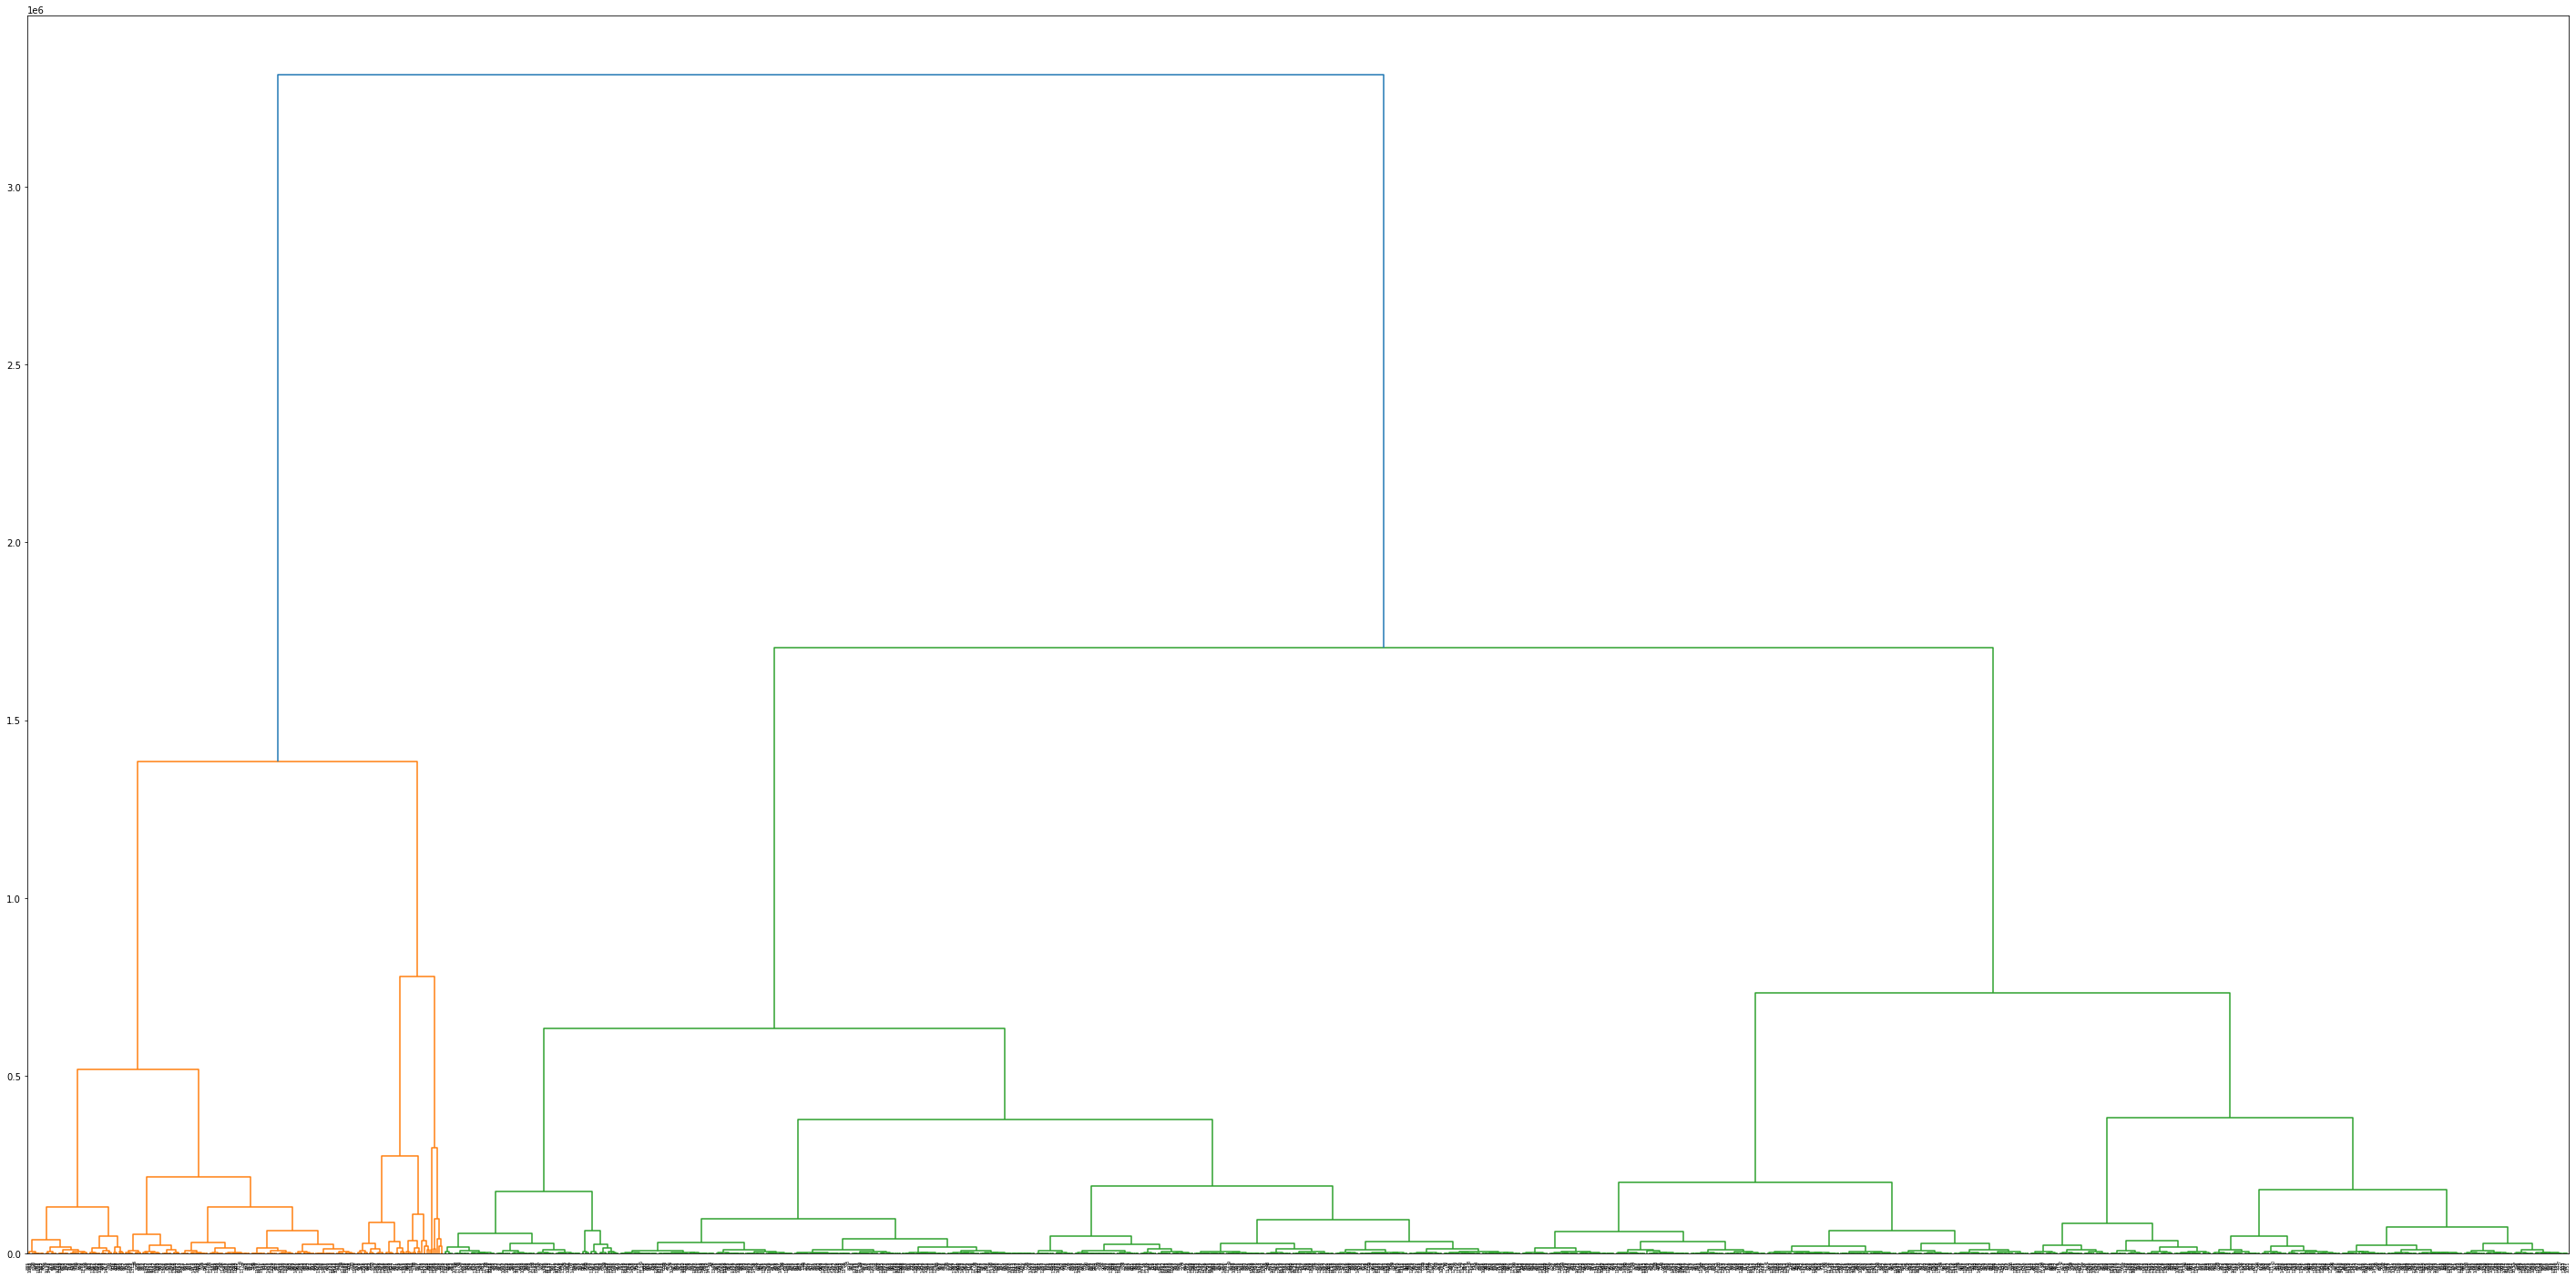

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# feature selection

selectedData = df[[ 'OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF', 'SalePrice']]

Z = linkage(selectedData, 'ward')

plt.figure(figsize=(50, 25))
dendrogram(Z)
plt.show()

## 2.2 Data Preparation and Machine Learning

**Address the business question of “what factors affect the house price and in which way?” using the provided dataset. Note that for supervised learning, it is important to partition the data before data preparation to avoid data leakage. Before answering the following questions, you need to split the data into a training set and a test set with a 70-30 splitting (use a random state=309).**

In [229]:
import numpy as np
from sklearn.model_selection import train_test_split

# split data set
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'SalePrice'], df['SalePrice'], test_size=0.3, random_state=309)

**Determine and describe the data preprocessing steps applied to the provided dataset, e.g. handle missing data, encoding categorical data, normalise the data if necessary, and/or remove any unnecessary instances, these could be redundant instances, outliers or non-effective instances and so forth. Show the process in your code/workflow. Submit a copy of the processed dataset (in CSV format).**


In [230]:
# handle missing data - delete all features w/ missing data, as per Friday 26/08 helpdesk

listL = df.columns
listT = []
labels = []

for label in listL:
    if(label != "SalePrice" and X_train[label].isnull().sum() != 0) :
        X_train = X_train.drop(label, axis=1)
        listT.append(label)
    else:
        labels.append(label)

for label in listT:
    X_test = X_test.drop(label, axis=1)       
    
print("Dropped features: ", listT)



Dropped features:  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [231]:
# drop id too
X_train = X_train.drop(['Id'], axis=1)
X_test = X_test.drop(['Id'], axis=1)

# remove duplicates
X_train = X_train.drop_duplicates()
X_test = X_test.drop_duplicates()

In [232]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# encoding categorical data and scaling
listOfCategorica = ['MSZoning', 'Street', 'Alley', 'LotShape', 
                    'LandContour', 'Utilities', 'LotConfig', 
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                    'BldgType', 'HouseStyle',  'RoofStyle', 'RoofMatl', 
                    'Exterior1st', 'Exterior2nd', 'MasVnrType',  
                    'Foundation',  'Heating', 'CentralAir', 'Electrical', 'SaleType',
                    'SaleCondition', 'MiscFeature', 'PavedDrive', 
                   'GarageType', 'MSSubClass']
listOfNumericals = ['OverallQual', 'OverallCond', 
                    'KitchenQual', 'BsmtQual', 'BsmtCond', 
                    'BsmtExposure', 'HeatingQC', 'BsmtFinType1','BsmtFinType2',
                    'ExterQual', 'ExterCond', 'PoolQC', 'Fence', 'GarageCond', 
                   'GarageQual', 'GarageFinish', 'FireplaceQu', 
                   'Functional', 'MSSubClass']
listOfContinuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
                    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                    'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                    'HalfBath', 'Bedroom', 'Kitchen', 'YrSold', 'MoSold', 'MiscVal',
                    'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch',
                    'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars',
                   'GarageYrBlt', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr',
                   'BedroomAbvGr']

listOfNumericalOrder = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                        ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
                        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        ['NA', 'Unf', 'RFn', 'Fin'],
                        ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                        ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
                       ]
                        
# one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# one hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
encoders = [] # also scalers

for label in labels:
    if label in listOfNumericals and label in listT: 
        enc = OrdinalEncoder()
        enc.fit(df[[label]])
        
        transformed1 = enc.transform(X_test[[label]])
        transformed2 = enc.transform(X_train[[label]])
        
        X_test[label] = transformed1
        X_train[label] = transformed2
        
    elif label in listOfContinuous and label in listT: # scaling here
        # based on https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/
        scaler = StandardScaler()
        scaler = scaler.fit(X_train[[label]])
        
        transformed1 = scaler.transform(X_test[[label]])
        transformed2 = scaler.transform(X_train[[label]])
        
        X_test[label] = transformed1
        X_train[label] = transformed2
        
display(X_train)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
447,60,11214,7,5,1998,1999,0,0,930,930,...,0,0,0,1,0,0,0,0,1,0
756,60,10769,8,5,2007,2007,20,0,846,866,...,0,0,0,1,0,0,0,0,1,0
1091,160,2160,7,5,1999,2000,510,0,90,600,...,0,0,0,1,0,0,0,0,1,0
1282,20,8800,5,7,1977,2008,532,144,364,1040,...,0,0,0,1,0,0,0,0,1,0
877,60,8834,9,5,2004,2005,1170,0,292,1462,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,120,6240,8,5,2006,2006,863,0,461,1324,...,0,0,0,1,0,0,0,0,1,0
1425,20,10721,6,6,1959,1959,0,0,1252,1252,...,0,0,0,1,0,0,0,0,1,0
993,60,8846,6,5,2005,2006,0,0,750,750,...,0,0,1,0,0,0,0,0,0,1
916,20,9000,2,3,1949,1950,50,0,430,480,...,0,0,0,1,1,0,0,0,0,0


As you can see, I fitted the encoders with the entire data set, not just the training set. I believe that this is not data leakage, as usually, *ALL* possible categories would be known, so even if the training set doesn't contain a data set, the categories are known to the people developing this data analysis. I ran it on the whole data set, so I wouldn't need to go through each category and manually write down all categories (as I don't have time for that, sorry.)

In [233]:
# export!

result = pd.concat([X_train, X_test], axis=0)
resul2 = pd.concat([y_train, y_test], axis=0)

result.insert(len(result.columns), "SalePrice", resul2["SalePrice"])

result.to_csv('changed.csv', index=False)  

C:\Users\Ella\AppData\Local\Temp\ipykernel_17956\3020564066.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result.insert(len(result.columns), "SalePrice", resul2["SalePrice"])


**Utilise two different dimensionality reduction techniques to identify which features are irrelevant
and/or redundant to predicting the house price. Report the dimension reduction process and remove redundant/irrelevant data. Show the process in your code/workflow.**

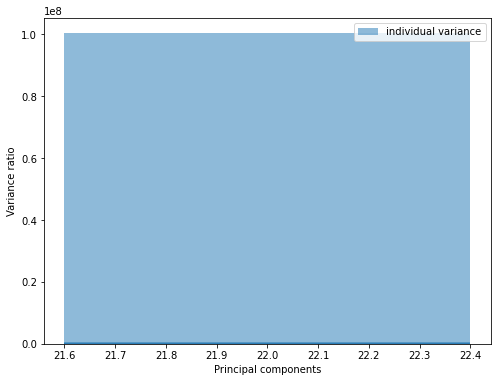

In [236]:
# dimensionality reduction technique #1


In [ ]:
# dimensionality reduction technique #2


**Now approach data mining goals on your preprocessed data using machine learning methods.**

**(a) With the two groups of features selected in previous question, use the ordinary linear regression and ridge
regression (with alpha=0.5 ) for predicting the house prices. Comparing their results regarding the mean
squared errors on the training set and the test set. Present and analyse the learnt regression models, and
highlight your observations. Submit your code or workflow.**


In [ ]:
# ordinary linear regression

In [ ]:
# ridge regression (with alpha=0.5 )

**(b) Using Random Forest, which is a more powerful ensemble regression method to predict the house price,
compare with the results of linear regression and ridge regression, highlight your observations.**

In [ ]:
# random forest